In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Fish_dataset.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

<AxesSubplot:xlabel='Species', ylabel='count'>

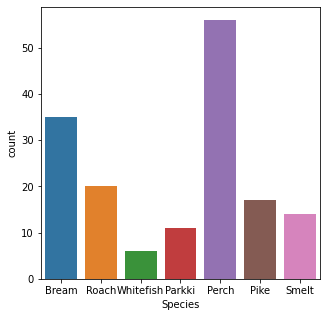

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(x=df.Species)

<AxesSubplot:ylabel='Density'>

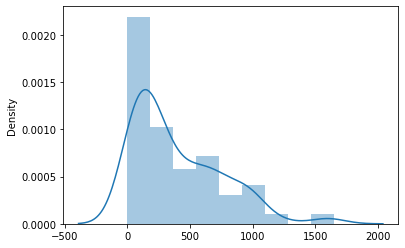

In [7]:
sns.distplot(x=df.Weight)

In [8]:
df = df[df.Weight != 0]
df.Weight = np.log(df.Weight)

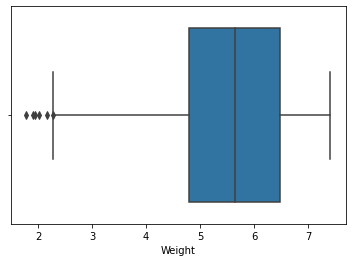

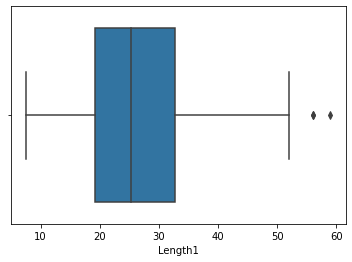

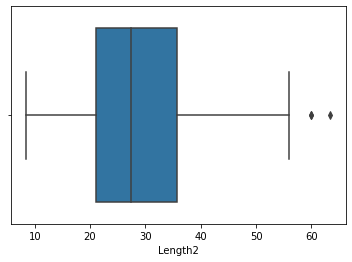

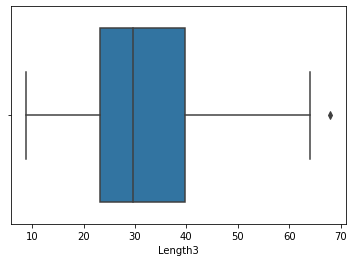

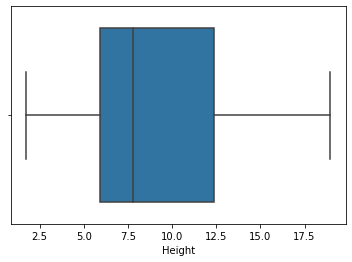

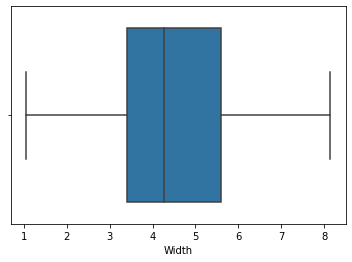

In [9]:
for col in df:
    if df[col].dtype!=object:
        plt.figure()
        ab=sns.boxplot(x=df[col],data=df)

In [10]:
#Removing the outliers using formula Q1 - 1.5*IQR and Q3 + 1.5*IQR
Q1 = df.Weight.quantile(0.25)
Q3 = df.Weight.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Weight >= (Q1 - (1.5*IQR))) & (df.Weight <= (Q3 + (1.5*IQR)))]

In [11]:
from sklearn import preprocessing 
   
label_encoder = preprocessing.LabelEncoder() 
  
df['Species']= label_encoder.fit_transform(df['Species']) 
  
df['Species'].unique() 

array([0, 4, 6, 1, 2, 3, 5])

In [12]:
X=df.drop(['Weight'],axis=1)
X

,Species,Length1,Length2,Length3,Height,Width
0,0,23.2,25.4,30.0,11.5200,4.0200
1,0,24.0,26.3,31.2,12.4800,4.3056
2,0,23.9,26.5,31.1,12.3778,4.6961
3,0,26.3,29.0,33.5,12.7300,4.4555
4,0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,5,11.5,12.2,13.4,2.0904,1.3936
155,5,11.7,12.4,13.5,2.4300,1.2690
156,5,12.1,13.0,13.8,2.2770,1.2558
157,5,13.2,14.3,15.2,2.8728,2.0672


In [13]:
y=df['Weight']
y

0      5.488938
1      5.669881
2      5.828946
3      5.894403
4      6.063785
         ...   
154    2.501436
155    2.595255
156    2.501436
157    2.980619
158    2.990720
Name: Weight, Length: 152, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [15]:
X_train

,Species,Length1,Length2,Length3,Height,Width
43,4,20.4,22.0,24.7,5.8045,3.7544
63,1,16.3,17.7,19.8,7.4052,2.6730
38,4,18.2,19.8,22.2,5.6166,3.1746
77,2,16.2,18.0,19.2,5.2224,3.3216
7,0,27.6,30.0,35.0,12.6700,4.6900
...,...,...,...,...,...,...
41,4,19.1,20.8,23.1,6.1677,3.3957
37,4,17.5,18.8,21.2,5.5756,2.9044
71,1,24.0,26.0,29.0,11.3680,4.2340
45,4,20.5,22.5,25.3,7.0334,3.8203


In [16]:
y_train

43     5.010635
63     4.499810
38     4.465908
77     4.605170
7      5.966147
         ...   
41     4.700480
37     4.356709
71     5.703782
45     5.075174
157    2.980619
Name: Weight, Length: 114, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
y_pred

array([5.41755436, 5.38672131, 3.16009498, 4.56807423, 7.35772002,
       5.26347752, 6.2430104 , 4.13904126, 4.97130857, 4.42983072,
       6.83752293, 4.78420092, 4.82439337, 4.95229692, 6.24773012,
       6.07422906, 4.3554201 , 4.00662858, 4.54608938, 3.82845768,
       5.75084136, 5.87378421, 4.79776015, 4.5375921 , 6.89081351,
       3.79794322, 4.72787094, 5.08795102, 6.20294353, 4.75423787,
       3.21285791, 4.65726148, 6.08331426, 4.95388753, 4.90941964,
       5.10602548, 4.97971524, 4.2209538 ])

In [18]:
y_test

53     5.605802
107    5.703782
155    2.595255
46     4.941642
143    7.346010
104    5.579730
6      6.214608
62     4.094345
50     5.298317
78     4.356709
25     6.586172
66     4.941642
92     5.010635
55     5.598422
13     5.828946
109    6.242223
81     4.442651
74     3.688879
39     4.787492
35     3.688879
132    6.063785
2      5.828946
84     4.828314
42     4.787492
123    7.003065
73     3.465736
86     4.787492
128    5.298317
137    6.214608
82     4.700480
154    2.501436
83     4.744932
11     6.214608
97     4.976734
96     5.416100
101    5.384495
56     5.598422
36     4.234107
Name: Weight, dtype: float64

In [19]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
53,5.605802,5.417554
107,5.703782,5.386721
155,2.595255,3.160095
46,4.941642,4.568074
143,7.346010,7.357720


In [20]:
print(linreg.intercept_)
print(linreg.coef_)

2.566116288695836
[-0.09280238 -0.09875755  0.0387138   0.09301683 -0.00545501  0.38686468]


In [21]:
model_score =linreg.score(X_train,y_train)
model_score

0.9392692028569384

In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.22755671181044712
Mean Squared Error: 0.08752098240074922
Root Mean Squared Error: 0.2958394537595505


In [23]:
from sklearn.metrics import r2_score
s = r2_score(y_test,y_pred)
print('Our Accuray score is',s*100,'%')

Our Accuray score is 92.20018010872656 %


In [24]:
prediction = pd.DataFrame()
prediction['Actual'] = y_test
prediction['Predicted'] = y_pred

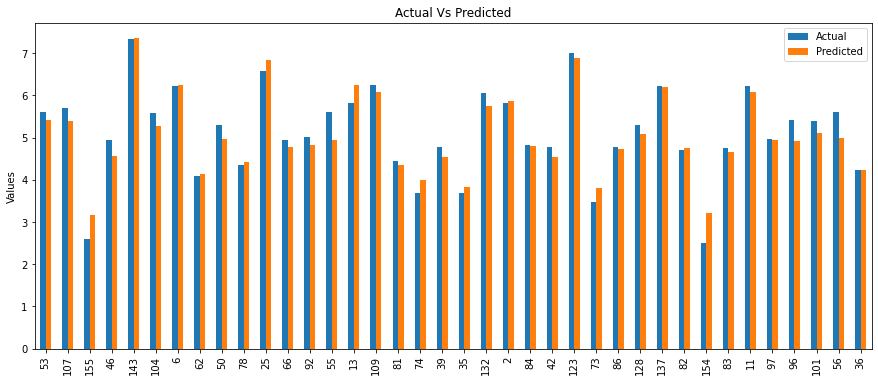

In [25]:
prediction.plot(kind='bar',figsize=(15,6))
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.title("Actual Vs Predicted")
plt.ylabel("Values")
plt.show()

In [26]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2365.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):                   1.04e-142
Time:                        23:49:40   Log-Likelihood:                         -130.66
No. Observations:                 152   AIC:                                      273.3
Df Residuals:                     146   BIC:                                      291.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Species        0.2894      0.030      9.521      0.000       0.229       0.349
Length1       -0.8321      0.189     -4.392      0.000      -1.207      -0.458
Length2        0.9235      0.201      4.596      0.000       0.526       1.321
Length3       -0.0718      0.086     -0.831      0.407      -0.243       0.099
Height         0.1824      0.048      3.835      0.000       0.088       0.276
Width          0.1992      0.104      1.914      0.058      -0.006       0.405
==============================================================================
Omnibus:                       13.218   Durbin-Watson:                   0.361
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.969
Skew:                          -0.761   Prob(JB):                     0.000562
Kurtosis:                       2.782   Cond. No.                         315.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""